In [2]:
## Imports

import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.datasets import mnist
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from tensorflow.keras.layers import Dense, Input, Flatten,Reshape, LeakyReLU as LR,Activation, Dropout
from tensorflow.keras.models import Model, Sequential
import argparse
import os
plt.rcParams["figure.figsize"] = (13,7)

In [4]:
source_intensity = 10000000
detector_area = 0.02 #metre square
efficiency = 1
size = 100

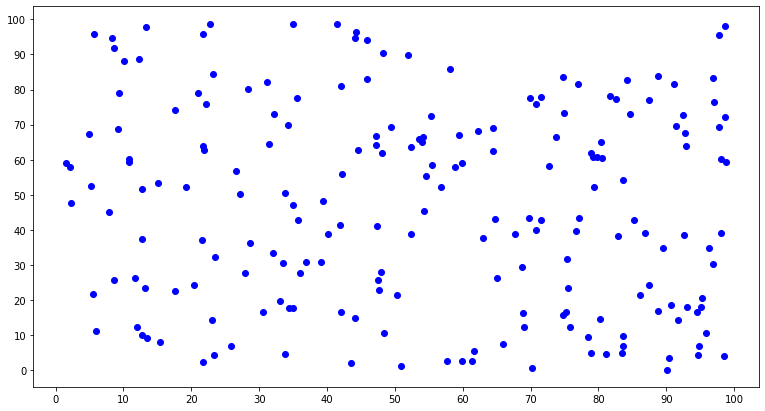

In [22]:
## Distribute sensors in AoI

sensor_locations = np.random.rand(200, 2) * (size)
plt.scatter(sensor_locations[:,0], sensor_locations[:,1], color='blue')
plt.xticks(np.arange(0, size+1, size**(1/2)))
plt.yticks(np.arange(0, size+1, size**(1/2)))
plt.show()

In [9]:
## Source locations generated from trajectory dataset (GeoLife + Synthetic)

source_locations = np.load("Merged_data_array_train.npy", allow_pickle=True)

In [15]:
## Deleting any source trajectory less than 20 time steps

new_source_locations = []
for i in source_locations:
    if i.shape[0] > 20:
        new_source_locations.append(i)
new_source_locations = np.array(new_source_locations)

C:\Users\kshah\AppData\Local\Temp\ipykernel_1160\2696306803.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_source_locations = np.array(new_source_locations)


In [57]:
def generate_cpm_grid(source_loc, sensor_locs, size):
    x = np.zeros([size,size])
    for sensor_loc in sensor_locs:
        x[int(sensor_loc[0]/size)][int(sensor_loc[1]/size)] = (source_intensity * detector_area * efficiency) / (math.dist(sensor_loc, source_loc)**2)
    return x

In [58]:
source_loc = [22,34]
x = generate_cpm_grid(source_loc, sensor_locations, 10)

In [59]:
def plot_grid(source_locations,array,size):
    arr = np.copy(array) 
    fig, ax = plt.subplots()
    ax.grid(which='major', color='black', linestyle='-', linewidth=1)
    # To display the values
    ax.set_xlim([0,size**2])
    ax.set_ylim([0,size**2])
    for [i,j], z in zip(source_locations,arr.ravel()):
        ax.text(i+0.5, j+0.5, '{:0.1f}'.format(z), ha='center', va='center')
    plt.xticks(np.arange(0, size**2, size))
    plt.yticks(np.arange(0, size**2, size))
    plt.show()
    
def generate_grid_coordinates(size):
    grid_coordinates = np.zeros((size,size,2))
    for i in range(size):
        for j in range(size):
            grid_coordinates[i][j][0] = ((i+1) * size) - size/2
            grid_coordinates[i][j][1] = ((j+1) * size) - size/2
    return grid_coordinates

grid_coordinates = generate_grid_coordinates(int(size**(1/2))) # sensor locations
source_locations = grid_coordinates.reshape(size, 2)

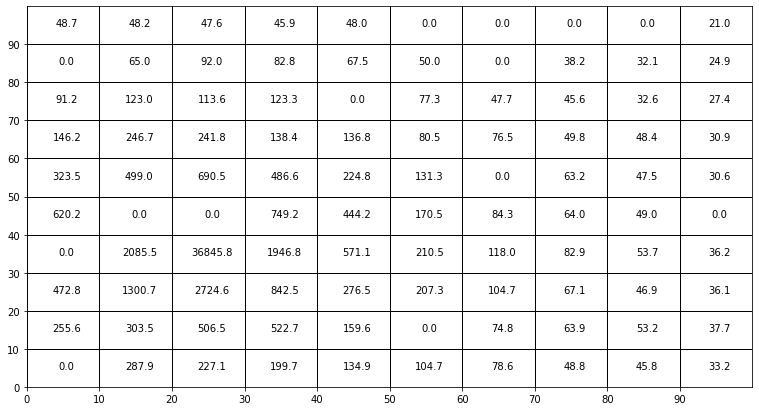

In [60]:
plot_grid(source_locations, x, int(size**(1/2)))

In [62]:
x = x.reshape(size)
x[x==0.0] = np.NaN

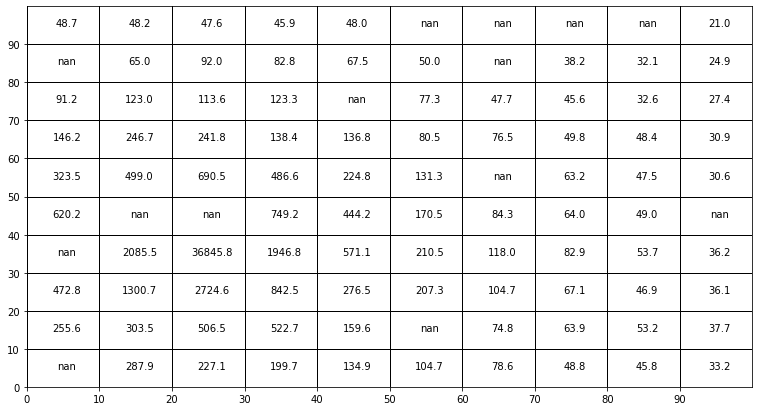

In [65]:
x = x.reshape(int(size**(1/2)), int(size**(1/2)))
plot_grid(source_locations, x, int(size**(1/2)))